In [58]:
import os
csv_files = [f for f in os.listdir("./my_data") if f.endswith(".csv")]
print("\n找到的 CSV 檔：", csv_files)
import pandas as pd

# 用 pandas 讀取第一個 CSV 檔
csv_path = os.path.join("./my_data", csv_files[0])
df = pd.read_csv(csv_path)
print("\n成功讀取：", csv_path)
print("\n資料前五筆：")
print(df.head())
print(df.info())


找到的 CSV 檔： ['weatherAUS.csv']

成功讀取： ./my_data/weatherAUS.csv

資料前五筆：
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm

In [59]:
# 分類變數

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)
df[categorical].head()



There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [60]:
#分類變數缺失

df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [61]:
# 設定缺失值比例閾值
threshold = 0.5

# 刪除缺失值比例超過閾值的欄位
df_cleaned = df.loc[:, df.isnull().mean() < threshold]

# 使用眾數填補類別型欄位的缺失值

df_cleaned['WindGustDir'] =df_cleaned['WindGustDir'].fillna(df_cleaned['WindGustDir'].mode()[0])
df_cleaned['WindDir9am'] =df_cleaned['WindDir9am'].fillna(df_cleaned['WindDir9am'].mode()[0])
df_cleaned['WindDir3pm'] =df_cleaned['WindDir3pm'].fillna(df_cleaned['WindDir3pm'].mode()[0])
df_cleaned['RainToday'] =df_cleaned['RainToday'].fillna(df_cleaned['RainToday'].mode()[0])

# 填補數值型欄位的缺失值
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# 刪除 'RainTomorrow' 欄位缺失值的資料行
df_cleaned.dropna(subset=['RainTomorrow'], inplace=True)

# 定義需處理的欄位
columns_to_impute = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

# 依據地區（Location）計算每個欄位的平均值
for col in columns_to_impute:
    # 計算每個地區的平均值
    regional_means = df.groupby('Location')[col].mean()
    
    # 定義填補函數
    def impute_region_mean(row):
        if pd.isnull(row[col]):
            return regional_means[row['Location']]
        else:
            return row[col]
    
    # 應用填補函數
    df.loc[:, col] = df.apply(impute_region_mean, axis=1)



# 顯示處理後的資料集資訊
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    99949 non-null   float64
 6   Sunshine       92291 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       110493 non-nul

In [62]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009

In [63]:
#解析為 datetime 型態，並從中提取年月日、月、日、星期幾等特徵
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # 假設日/月/年格式
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday  # 0 = Monday, 6 = Sunday


In [64]:
# 先處理目標欄位
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

# 找出所有 object 類型欄位（RainTomorrow 已經不是 object，所以不用移除）
cat_cols = df.select_dtypes(include='object').columns.tolist()

# 對類別欄位做 one-hot 編碼
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [65]:
#建立滯後特徵
lag_features = ['Rainfall', 'MinTemp', 'MaxTemp']
for lag in lag_features:
    df[f'{lag}_lag1'] = df[lag].shift(1)
    df[f'{lag}_lag2'] = df[lag].shift(2)

#滾動窗口特徵
window = 3
for feat in lag_features:
    df[f'{feat}_rolling_mean_{window}'] = df[feat].rolling(window).mean()


In [66]:
#NAN清除
df = df.dropna().reset_index(drop=True)


Text(0, 0.5, 'WindSpeed3pm')

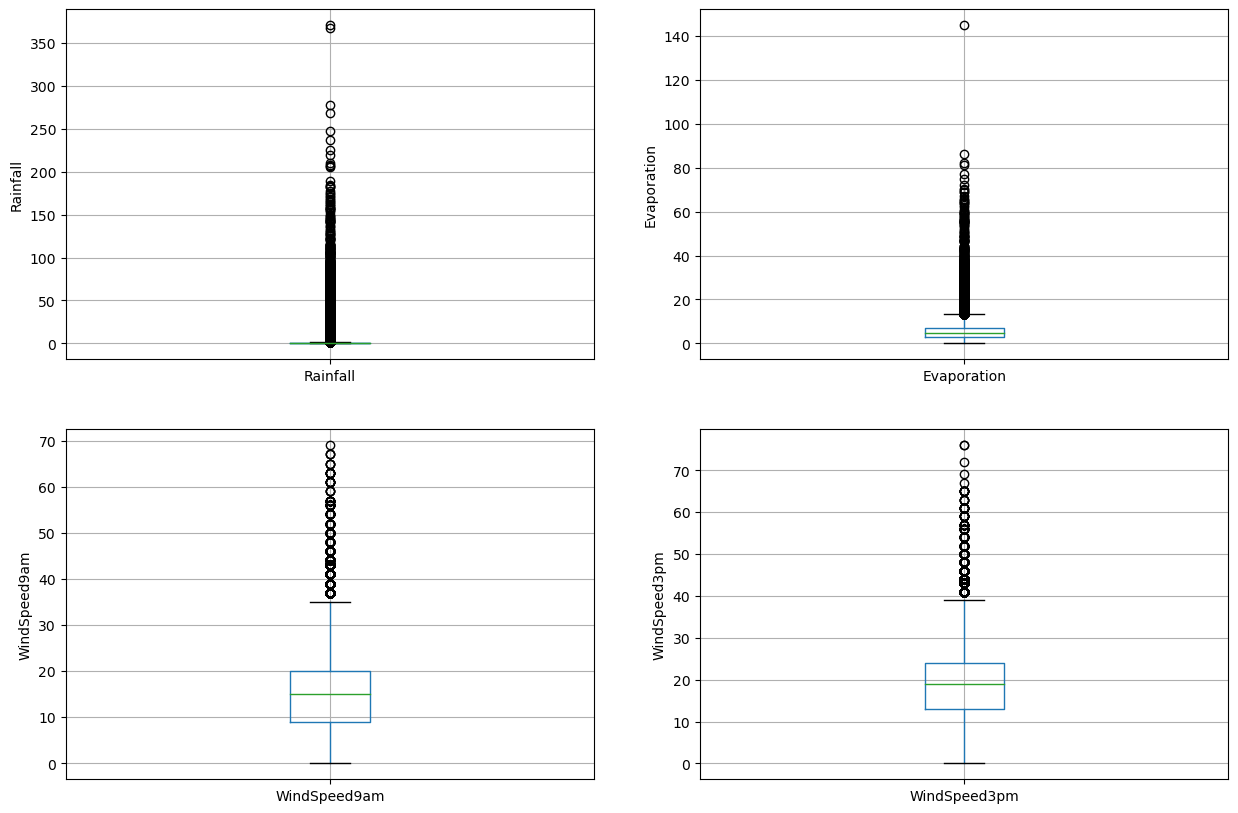

In [67]:
# draw boxplots to visualize outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

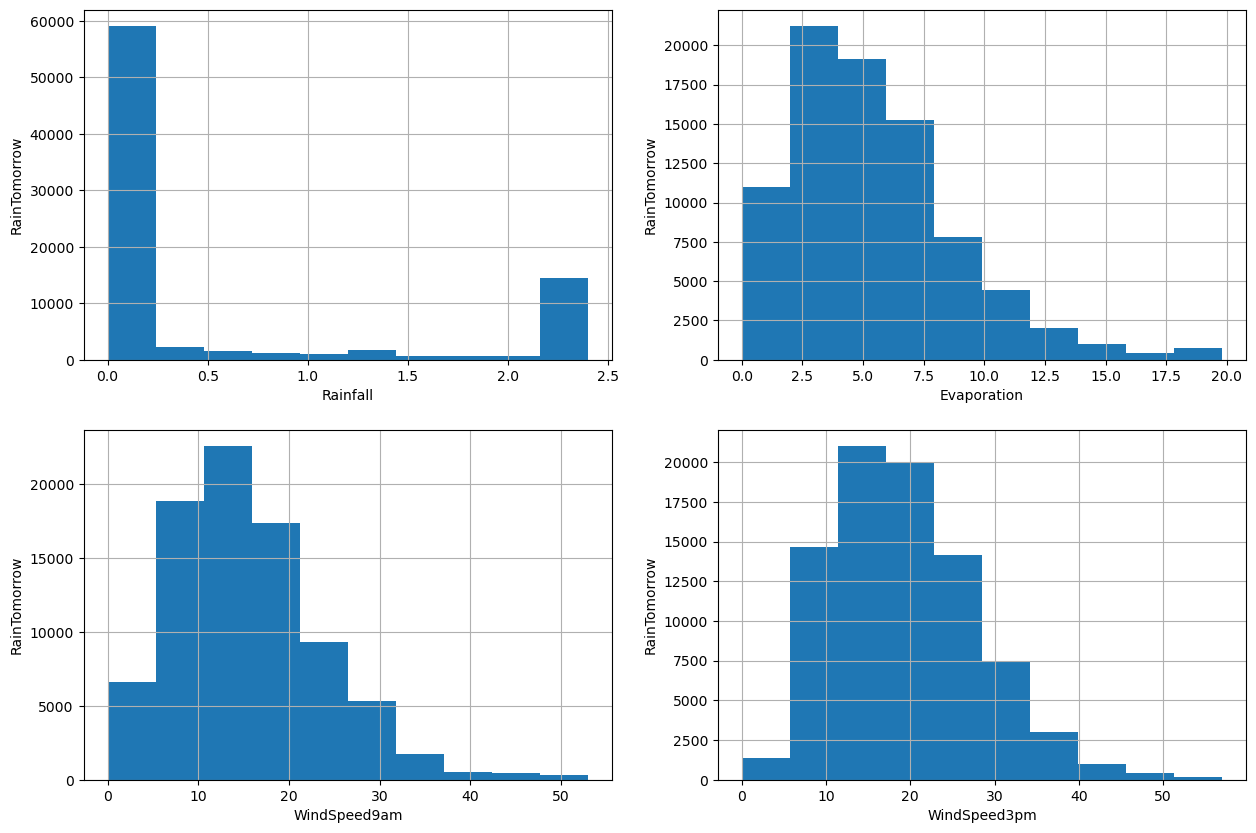

In [82]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [83]:
# 定義異常值處理函數 (Capping)
def cap_outliers(df, column, factor=3):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - factor * IQR
    upper_fence = Q3 + factor * IQR
    # 將超出上下界的值截到上下界
    df[column] = df[column].clip(lower_fence, upper_fence)
    print(f"{column} 已處理: 下界={lower_fence}, 上界={upper_fence}")

# 需要處理的數值欄位
num_cols_to_cap = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']

for col in num_cols_to_cap:
    cap_outliers(df, col, factor=3)


Rainfall 已處理: 下界=-1.7999999999999998, 上界=2.4
Evaporation 已處理: 下界=-9.600000000000001, 上界=19.8
WindSpeed9am 已處理: 下界=-24.0, 上界=53.0
WindSpeed3pm 已處理: 下界=-20.0, 上界=57.0


In [84]:
from sklearn.model_selection import train_test_split
#無結果
X = df.drop('RainTomorrow', axis=1)
#有結果
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train.shape, X_test.shape

((66464, 124), (16616, 124))

In [88]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 假設 X 已經是前處理過後的數值 + one-hot 編碼資料
# 如果 X 裡還有 'Date' 或其他非數值欄位，先刪除：
#測試集不做 SMOTE，保持原始分布，避免資料洩漏
if 'Date' in X.columns:
    X = X.drop(columns=['Date'])

# 劃分訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 使用 SMOTE 過採樣
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("原始訓練集類別分佈：")
print(y_train.value_counts())
print("過採樣後訓練集類別分佈：")
print(pd.Series(y_train_resampled).value_counts())

# 對數值特徵做標準化
scaler = StandardScaler()
num_feats = X_train_resampled.select_dtypes(include=np.number).columns.tolist()
X_train_resampled[num_feats] = scaler.fit_transform(X_train_resampled[num_feats])
X_test[num_feats] = scaler.transform(X_test[num_feats])


原始訓練集類別分佈：
0    50640
1    14422
2     1402
Name: RainTomorrow, dtype: int64
過採樣後訓練集類別分佈：
1    50640
0    50640
2    50640
Name: RainTomorrow, dtype: int64
